# Learning Curves

In [1]:
import os
import numpy as np
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_log(data):
    log = {}
    for s in ['sgd_bandit', 'sgd_cv', 'saga_bandit', 'saga_full', 'sgd_full']:
        d = defaultdict(list)
        for t in ['train', 'dev', 'norm', 'variance']:
            for filename in glob.glob(os.path.join('results', data, s+'_*_'+t+'.dat')):
                d[t].append(np.fromfile(filename))
        log[s] = d
    return log

In [3]:
label = {'train': 'Avg. cumulative Loss',
         'dev': 'Avg. cumulative Loss', 
         'norm': 'Squared Norm of Gradients', 
         'variance': 'Variance'}
color = {'saga full': '#559C3F', 
         'saga bandit': '#3678AF', 
         'sgd bandit': '#D2342B', 
         'sgd cv': '#F18533', 
         'sgd full': '#634395'}
legends = {'saga bandit': r'$\rho$-SAGA', 
           'sgd bandit': r'$\rho$-SGD', 
           'sgd cv': r'$\rho$-SGD + CV',
           'saga full': r'SAGA (full)',
           'sgd full': r'SGD (full)'}

def plot_curves(results, s, title, f=False, r=False, ylim=None, xlim=None):
    legend = []
    means = []
    stds = []
    for name in ['sgd_bandit', 'sgd_cv', 'saga_bandit', 'saga_full', 'sgd_full']:
        m = results[name]
        n = ' '.join(name.split('_')[:2])
        legend.append(n)
        means.append(np.mean(m[s], axis=0))
        stds.append(np.std(m[s], axis=0))
    
    u = int(len(means[0])/10)
    report = '| %12s | %8s | %8s | %8s |\n' % ('method', 'min', 'stop', 'std')
    report += '|'+ '-'*47 + '|\n'
    for mean, std, l in zip(means, stds, legend):
        t = np.arange(len(mean))
        plt.plot(t, mean, label=legends[l], color=color[l])
        plt.fill_between(t, mean - std, mean + std, alpha=0.1, color=color[l])
        plt.xscale('log')
        report += '| %12s | %8.5f | %8d | %8.5f |\n' % (l, mean.min(), mean.argmin(), std.mean())
    if r:
        print(report)
    
    if f:
        v = [np.min(means), np.max(means)]
        if ylim:
            v = [ylim[0], ylim[-1]]
        plt.plot([u/10, u/10], v, '--', color='0.3', lw=1, label='(1st epoch)')
    
    plt.legend()
    plt.xlabel('Number of Instances [in thousand]')
    plt.ylabel(label[s])
    plt.title(title + ' [' + s + ']')
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.show()

In [14]:
mnist_first = read_log('mnist_first')
mnist_partial = read_log('mnist_part')

In [18]:
mnist_partial = read_log('mnist_part')

|       method |      min |     stop |      std |
|-----------------------------------------------|
|   sgd bandit |  0.15208 |     6001 |  0.00999 |
|       sgd cv |  0.14884 |     6001 |  0.00684 |
|  saga bandit |  0.14981 |     6001 |  0.01357 |
|    saga full |  0.09021 |     6001 |  0.00014 |
|     sgd full |  0.09023 |     6001 |  0.00017 |



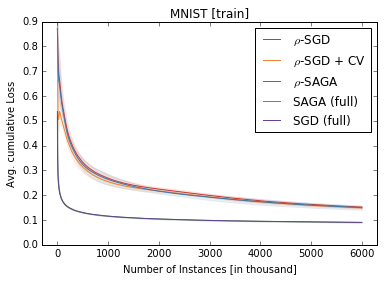

In [15]:
plot_curves(mnist_first, 'train', 'MNIST', r=True, xlim=(-300,6300))

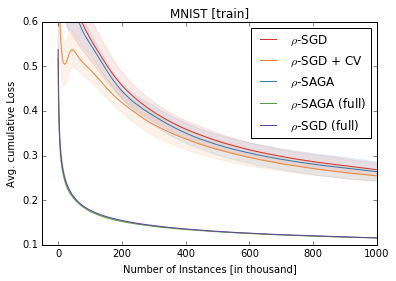

In [12]:
plot_curves(mnist_first, 'train', 'MNIST', xlim=(-50,1000), ylim=(0.1, 0.6))

|       method |      min |     stop |      std |
|-----------------------------------------------|
|   sgd bandit |  0.09355 |     5894 |  0.00735 |
|       sgd cv |  0.09347 |     5936 |  0.00691 |
|  saga bandit |  0.09350 |     5940 |  0.01557 |
|    saga full |  0.07960 |     5624 |  0.00008 |
|     sgd full |  0.07912 |     5961 |  0.00036 |



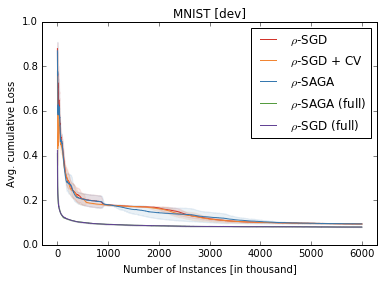

In [35]:
plot_curves(mnist, 'dev', 'MNIST', r=True, xlim=(-300,6300))

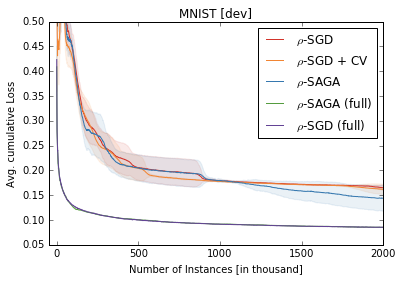

In [27]:
plot_curves(mnist, 'dev', 'MNIST', xlim=(-50,2000), ylim=(0.05,0.5))

|       method |      min |     stop |      std |
|-----------------------------------------------|
|   sgd bandit | 12.48906 |     6000 |  0.14356 |
|       sgd cv |  5.56339 |     6000 |  0.04430 |
|  saga bandit | 22.74419 |     6000 |  0.61305 |
|    saga full |  0.51292 |     6000 |  0.00297 |
|     sgd full | 12.16306 |     6000 |  0.00344 |



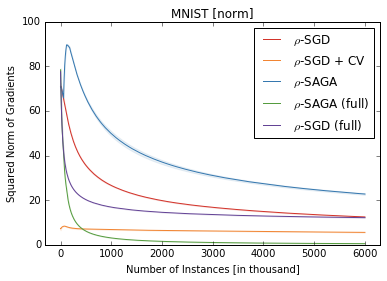

In [36]:
plot_curves(mnist, 'norm', 'MNIST', r=True, xlim=(-300,6300))

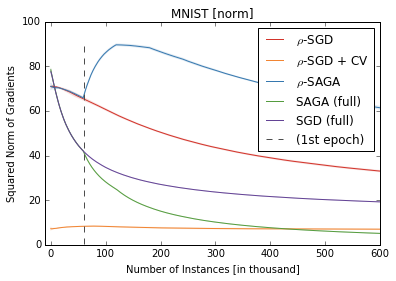

In [17]:
plot_curves(mnist_first, 'norm', 'MNIST', f=True, xlim=(-10, 600))

|       method |      min |     stop |      std |
|-----------------------------------------------|
|   sgd bandit | 12.48857 |     6000 |  0.14354 |
|       sgd cv |  5.56302 |     6000 |  0.04425 |
|  saga bandit | 22.74367 |     6000 |  0.61308 |
|    saga full |  0.51245 |     6000 |  0.00295 |
|     sgd full | 12.16258 |     6000 |  0.00344 |



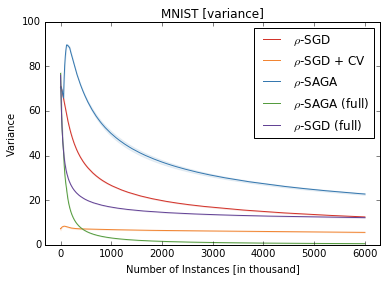

In [37]:
plot_curves(mnist, 'variance', 'MNIST', r=True, xlim=(-300,6300))

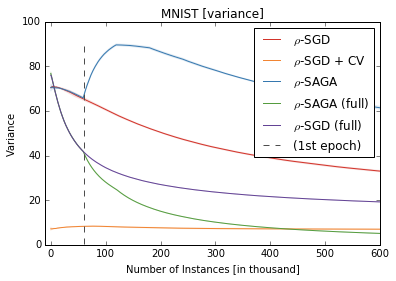

In [31]:
plot_curves(mnist, 'variance', 'MNIST', f=True, xlim=(-10, 600))